# ME460 Linkages - Prof. Mark Ganter
# 5 position path generator via dyad-standard equations

LEFT DYAD EQ.s
posl2= d1*(-1 + exp(1.74532925199433*I))*exp(I*t1) + d2*(exp(I*g2) - 1)*exp(I*t2) + 26.4 + 5*I
posl3= d1*(-1 + exp(3.83972435438753*I))*exp(I*t1) + d2*(exp(I*g3) - 1)*exp(I*t2) + 21 + 7.2*I
posl4= d1*(-1 + exp(4.18879020478639*I))*exp(I*t1) + d2*(exp(I*g4) - 1)*exp(I*t2) + 7 + 4*I
posl5= d1*(-1 + exp(4.45058959258554*I))*exp(I*t1) + d2*(exp(I*g5) - 1)*exp(I*t2) + 4.25*I

left 5 pos solution r1,t1,r2,t2= 13.4428871620397 49.8887656738193 -10.3522531026114 121.13031325262506
left 5 pos solution g2,g3,g4,g5= 324.6689168684554 191.12357823557292 135.23885543609487 111.21823777377143
abs(posl2)= 1.51e-15
abs(posl3)= 3.44e-15
abs(posl4)= 1.60e-15
abs(posl5)= 4.25e-16

************
alt-solution-check
left char solution g2,g3,g4,g5 -35.33034532277352 191.1271183417236 135.2425380604218 111.22186817093373
abs(left234)= 0.00146004692083499
abs(left235)= 0.00204019675112449
alt-solution-check
right char solution s2,s3,s4,s5 42.22726310530699 35.00966222129376 10.51874020759474 -1.0

<IPython.core.display.Javascript object>


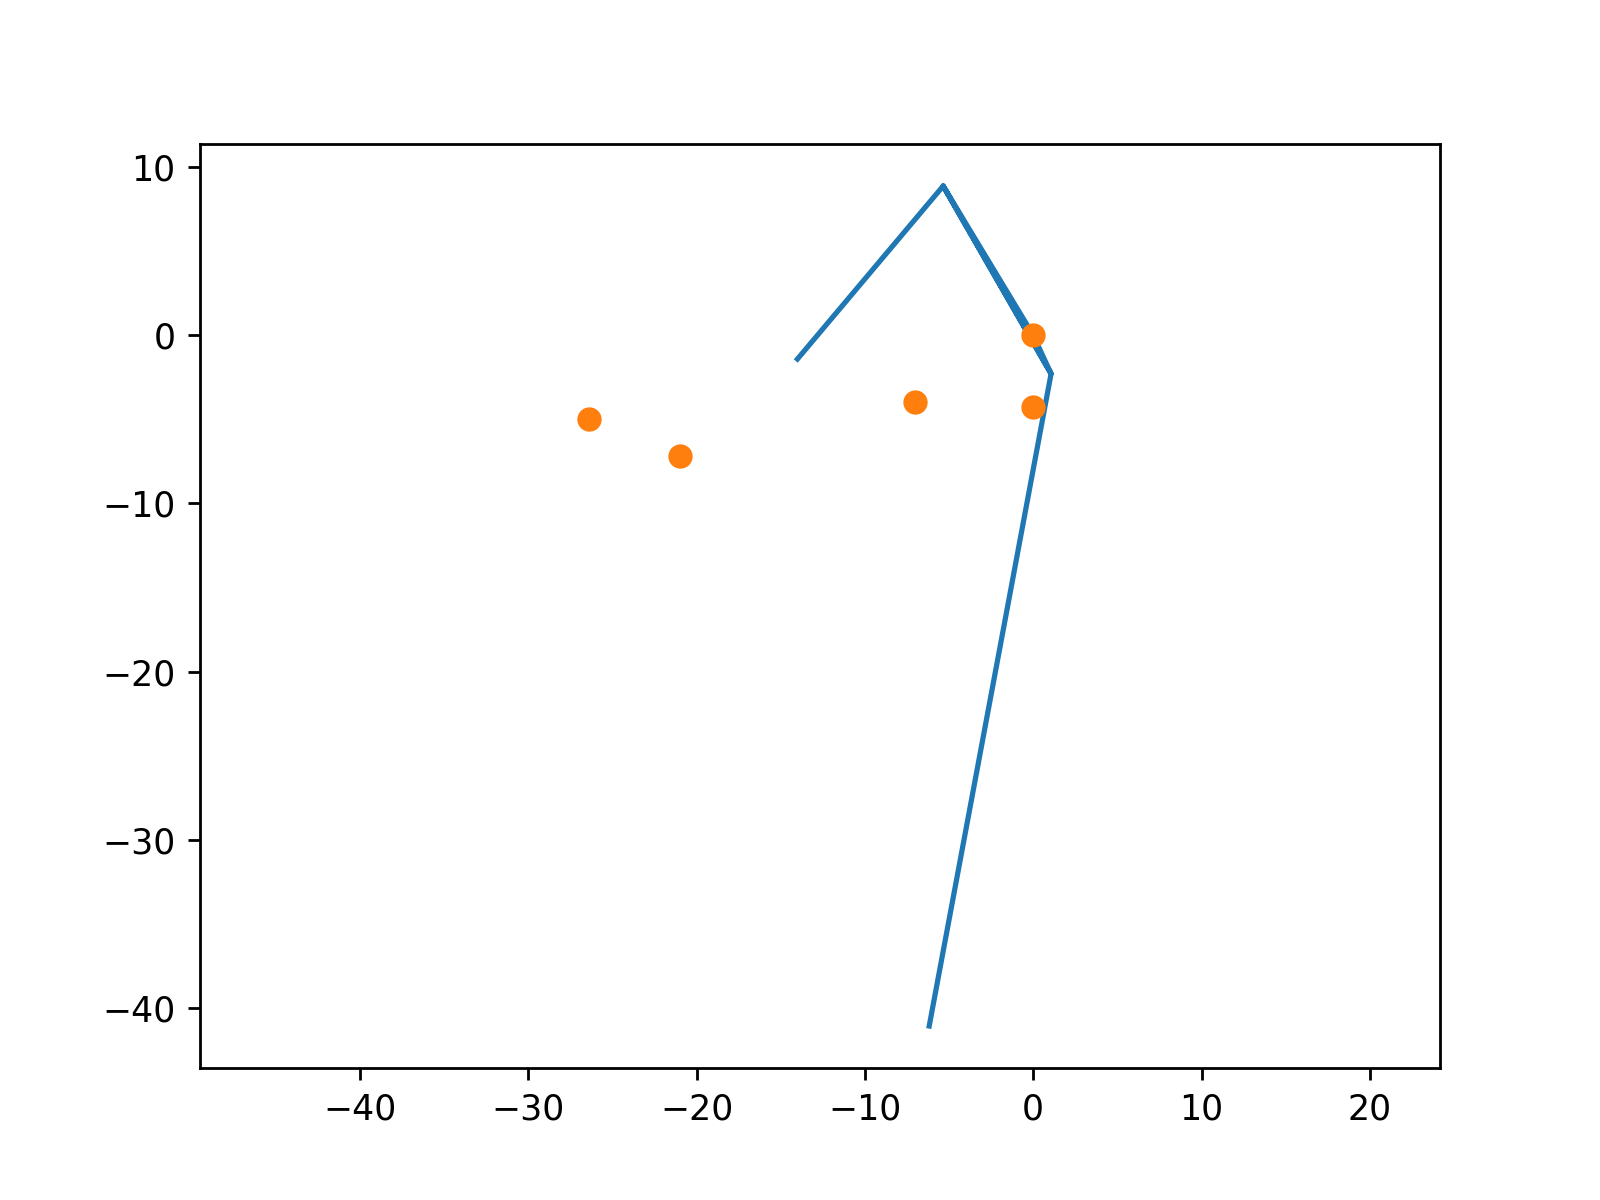

In [2]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *

import matplotlib
import matplotlib.pyplot as plt

# 5 precision coupler points
c1 = 0
c2 = -26.4 + (-5*I)
c3 = -21 + (-7.2*I)
c4 =  -7 + (-4*I)
c5 = 0 + (-4.25*I)


d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4,g5 = symbols("g2 g3 g4 g5", real=True)
s2,s3,s4,s5 = symbols("s2 s3 s4 s5",real=True)

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

del2 = c2-c1
del3 = c3-c1
del4 = c4-c1
del5 = c5-c1

p2 = radians(100)
p3 = radians(220)
p4 = radians(240)
p5 = radians(255)

# LEFT SIDE #
#write out the dyad-standard equations for left side of linkage 
# posl1 = r1+r2 - c1
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3)-1) - del3
posl4 = r1*(exp(I*p4)-1) + r2*(exp(I*g4)-1) - del4
posl5 = r1*(exp(I*p5)-1) + r2*(exp(I*g5)-1) - del5

print("LEFT DYAD EQ.s")
print("posl2=",posl2)
print("posl3=",posl3)
print("posl4=",posl4)
print("posl5=",posl5)
print()

ansl = nsolve((re(posl2),im(posl2),re(posl3),im(posl3),re(posl4),im(posl4),re(posl5),im(posl5)), (d1, t1, d2, t2, g2, g3, g4, g5),
             (2,radians(40),20,radians(80), radians(300),radians(7),radians(300),radians(315)), 
        maxsteps=300, tol=1.0e-9) #, verify=false, solver='halley')

print("left 5 pos solution r1,t1,r2,t2=",ansl[0],degrees(ansl[1])%360,ansl[2],degrees(ansl[3])%360)
print("left 5 pos solution g2,g3,g4,g5=",degrees(ansl[4])%360,degrees(ansl[5])%360,degrees(ansl[6])%360,degrees(ansl[7])%360)
print ("abs(posl2)=",N(abs(posl2.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3],g2:ansl[4],g3:ansl[5],g4:ansl[6],g5:ansl[7]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3],g2:ansl[4],g3:ansl[5],g4:ansl[6],g5:ansl[7]}) ),3))
print ("abs(posl4)=",N(abs(posl4.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3],g2:ansl[4],g3:ansl[5],g4:ansl[6],g5:ansl[7]}) ),3))
print ("abs(posl5)=",N(abs(posl5.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3],g2:ansl[4],g3:ansl[5],g4:ansl[6],g5:ansl[7]}) ),3))
print()

g2b = ansl[4]
g3b = ansl[5]
g4b = ansl[6]
g5b = ansl[7]

# alternate left solution
# now try characteristic polynomial approach
leftside234 = Matrix([[(exp(I*p2)-1),(exp(I*g2)-1),del2],[(exp(I*p3)-1),(exp(I*g3)-1),del3],[(exp(I*p4)-1),(exp(I*g4)-1),del4]])
detleft234 = leftside234.det()
leftside235 = Matrix([[(exp(I*p2)-1),(exp(I*g2)-1),del2],[(exp(I*p3)-1),(exp(I*g3)-1),del3],[(exp(I*p5)-1),(exp(I*g5)-1),del5]])
detleft235 = leftside235.det()
#print("detlefta=",detlefta)

#next solve left characteristic equation for g2, g3, g4 and g5
ans = nsolve((re(detleft234),im(detleft234),re(detleft235),im(detleft235)), (g2, g3, g4, g5), 
            (radians(-7),radians(200),radians(135),radians(100)), 
            maxsteps=200, tol=1.0e-3, verify=false)  #, verbose=true )
print("************")
print("alt-solution-check")
print("left char solution g2,g3,g4,g5",degrees(ans[0]),degrees(ans[1]),degrees(ans[2]),degrees(ans[3]))
print ("abs(left234)=",abs(detleft234.evalf(subs={g2:ans[0],g3:ans[1],g4:ans[2],g5:ans[3]}) ))
print ("abs(left235)=",abs(detleft235.evalf(subs={g2:ans[0],g3:ans[1],g4:ans[2],g5:ans[3]}) ))
#print()

g2a = ans[0]
g3a = ans[1]
g4a = ans[2]
g5a = ans[3]

# alternate right solution
# now try characteristic polynomial approach
rightside234 = Matrix([[(exp(I*s2)-1),(exp(I*g2a)-1),del2],[(exp(I*s3)-1),(exp(I*g3a)-1),del3],[(exp(I*s4)-1),(exp(I*g4a)-1),del4]])
detright234 = rightside234.det()
rightside235 = Matrix([[(exp(I*s2)-1),(exp(I*g2a)-1),del2],[(exp(I*s3)-1),(exp(I*g3a)-1),del3],[(exp(I*s5)-1),(exp(I*g5a)-1),del5]])
detright235 = rightside235.det()

#print("detright234=",detright234)

#next solve right characteristic equation for s2, s3, s4 and s5
ans = nsolve((re(detright234),im(detright234),re(detright235),im(detright235)), (s2, s3, s4, s5), 
            (radians(40),radians(30),radians(20),radians(10)), 
            maxsteps=200, tol=1.0e-3, verify=false)  #, verbose=true )

print("alt-solution-check")
print("right char solution s2,s3,s4,s5",degrees(ans[0]),degrees(ans[1]),degrees(ans[2]),degrees(ans[3]))
print ("abs(right234)=",abs(detright234.evalf(subs={s2:ans[0],s3:ans[1],s4:ans[2],s5:ans[3]}) ))
print ("abs(right235)=",abs(detright235.evalf(subs={s2:ans[0],s3:ans[1],s4:ans[2],s5:ans[3]}) ))
print("************")

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2)-1) + r4*(exp(I*g2b)-1) - del2
posr3 = r3*(exp(I*s3)-1) + r4*(exp(I*g3b)-1) - del3
posr4 = r3*(exp(I*s4)-1) + r4*(exp(I*g4b)-1) - del4
posr5 = r3*(exp(I*s5)-1) + r4*(exp(I*g5b)-1) - del5

print("RIGHT DYAD EQ.s")
print("posr2=",posr2)
print("posr3=",posr3)
print("posr4=",posr4)
print("posr5=",posr5)
print()

ansr = nsolve((re(posr2),im(posr2),re(posr3),im(posr3),re(posr4),im(posr4),re(posr5),im(posr5)), (d3, t3, d4, t4, s2, s3, s4,s5),
             (20,radians(80),2,radians(153),  radians(45),radians(30),radians(20),radians(10)), 
        maxsteps=300, tol=1.0e-9) #, verify=false, solver='halley')


print("right 5 pos solution r3,t3,r4,t4=",ansr[0],degrees(ansr[1])%360,ansr[2],degrees(ansr[3])%360)
print("right 5 pos solution s2,s3,s4,s5=",degrees(ansr[4])%360,degrees(ansr[5])%360,degrees(ansr[6])%360,degrees(ansr[7])%360)
print ("abs(posl2)=",N(abs(posr2.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3],s2:ansr[4],s3:ansr[5],s4:ansr[6],s5:ansr[7]}) ),3))
print ("abs(posl3)=",N(abs(posr3.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3],s2:ansr[4],s3:ansr[5],s4:ansr[6],s5:ansr[7]}) ),3))
print ("abs(posl4)=",N(abs(posr4.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3],s2:ansr[4],s3:ansr[5],s4:ansr[6],s5:ansr[7]}) ),3))
print ("abs(posl5)=",N(abs(posr5.evalf(subs={d3:ansr[0],t3:ansr[1],d4:ansr[2],t4:ansr[3],s2:ansr[4],s3:ansr[5],s4:ansr[6],s5:ansr[7]}) ),3))
print()

s2b = ansr[4]
s3b = ansr[5]
s4b = ansr[6]
s5b = ansr[7]

evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ansr[0],t3:ansr[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ansr[2],t4:ansr[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3
evalOa = 0

print("phi2 =",degrees(p2),"phi3 =",degrees(p3),"phi4 =",degrees(p4),"phi5 =",degrees(p5))
print("psi2 =",degrees(s2b),"psi3 =",degrees(s3b),"psi4 =",degrees(s4b),"psi4 =",degrees(s5b))
print("gamma2 =",degrees(g2b),"gamma3 =",degrees(g3b),"gamma4 =",degrees(g4b),"gamma5 =",degrees(g5b))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print("del4 =",N(del4.evalf(),3))
print("del5 =",N(del4.evalf(),3))
print()


print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R2 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

evalOa = c1-evalr2-evalr1 
evalA = c1-evalr2
evalB = c1-evalr4
evalOb = c1-evalr4-evalr3

print("Oa = ( ",evalOa,")")
print("A = (",evalA,")")
print("C = (",c1,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# attempt to rate the linkage
print()
print("* Linkage Rating *")
s = min(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
l = max(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
pnq = abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)
print('P+Q > S+L =',pnq ,'>',(s+l) )
if (abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)) > (s+l):
    print("grashof = true")
else:
    print("grashof = false")
    
print("Link length ratio l/s = ",l/s)
print()

# call matplotlib routines for a  plot  
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalA),re(c1),re(evalB),re(evalA),re(evalB),re(evalOb)],
    [im(evalOa),im(evalA),im(c1),im(evalB),im(evalA),im(evalB),im(evalOb)],
    [re(c1),re(c2),re(c3),re(c4),re(c5)],[im(c1),im(c2),im(c3),im(c4),im(c5)],'o',)
ax.set_aspect('equal',adjustable='datalim')
plt.show()
